# Advanced Plots

## Gráficos Avanzados

Matplotlib es increíblemente versátil, y aunque es más conocido por sus gráficos 2D, también tiene capacidades para la visualización en tres dimensiones. Además, ofrece una variedad de tipos de gráficos especializados que, aunque no se usan a diario, son herramientas poderosas para análisis específicos, como la visualización de incertidumbre, distribuciones o eventos discretos. En esta sección, exploraremos cómo ir más allá de las dos dimensiones y cómo usar algunos de estos gráficos más avanzados.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Step Chart

Un gráfico de escalones (step plot) muestra los datos como una serie de pasos horizontales y verticales. Es útil para visualizar datos que cambian discretamente en el tiempo, como valores de funciones por tramos o cambios de estado. La función `plt.step(x, y, **kwargs)` crea un gráfico de escalones, el argumento `where` Determina dónde ocurre el paso (`'pre'`, `'post'`, `'mid'`).

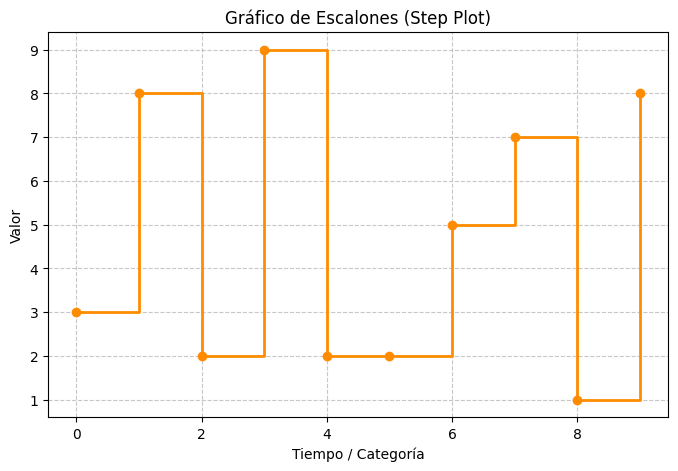

In [2]:
#Datos de ejemplo
x_steps = np.arange(0, 10)
y_steps = np.random.randint(1, 10, size=10)

plt.figure(figsize=(8, 5))
plt.step(x_steps, y_steps, where='post', color='darkorange', linewidth=2, marker='o', markersize=6)
plt.title('Gráfico de Escalones (Step Plot)')
plt.xlabel('Tiempo / Categoría')
plt.ylabel('Valor')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Error Bar Chart

Los gráficos de barras de error son esenciales para visualizar la incertidumbre en las mediciones o cálculos. Muestran la variación esperada o el rango de confianza alrededor de cada punto de datos. La función `plt.errorbar(x, y, yerr=None, xerr=None, fmt='', **kwargs)`: Crea un gráfico de línea o dispersión con barras de error.

- `yerr`: Error en el eje Y (puede ser un escalar, un array o un array de 2xN para errores asimétricos).
- `xerr`: Error en el eje X (similar a `yerr`).
- `fmt`: Formato de la línea y el marcador.
- `ecolor`: Color de las barras de error.
- `capsize`: Tamaño de los *"capuchones"* en los extremos de las barras de error.

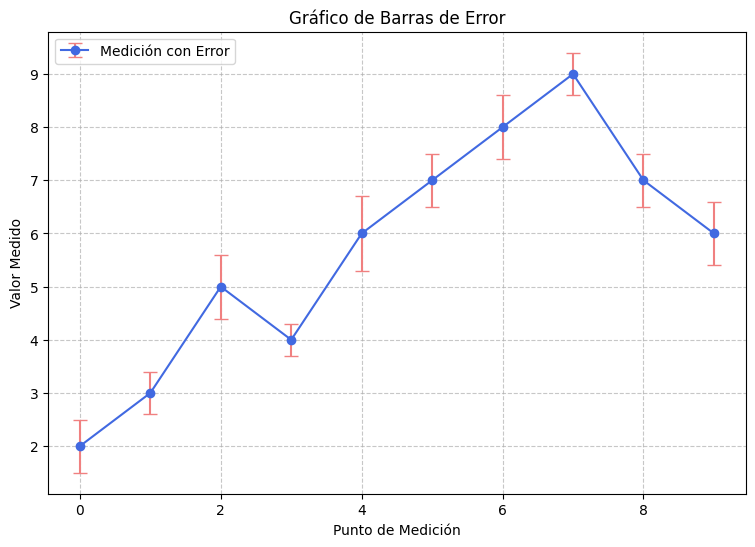

In [3]:
#Datos de ejemplo
x_data = np.arange(0, 10, 1)
y_data = np.array([2, 3, 5, 4, 6, 7, 8, 9, 7, 6])
y_error = np.array([0.5, 0.4, 0.6, 0.3, 0.7, 0.5, 0.6, 0.4, 0.5, 0.6])

plt.figure(figsize=(9, 6))
plt.errorbar(x_data, y_data, yerr=y_error, fmt='-o', color='royalblue',
             ecolor='lightcoral', capsize=5, label='Medición con Error')
plt.title('Gráfico de Barras de Error')
plt.xlabel('Punto de Medición')
plt.ylabel('Valor Medido')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Violin Plot

Los gráficos de violín son una alternativa más rica a los box plots para visualizar la distribución de datos. Muestran la densidad de probabilidad de los datos en diferentes valores, ofreciendo una visión de la forma y la simetría de la distribución. La función `plt.violinplot(dataset, **kwargs)` crea uno o más gráficos de violín.

- `dataset`: Una secuencia de arrays (*uno por violín*) o un array 2D.
- `showmeans`: Muestra la media de cada distribución.
- `showmedians`: Muestra la mediana de cada distribución.
- `showextrema`: Muestra los valores mínimos y máximos.
- `vert`: Si es `True` (por defecto), los violines son verticales.

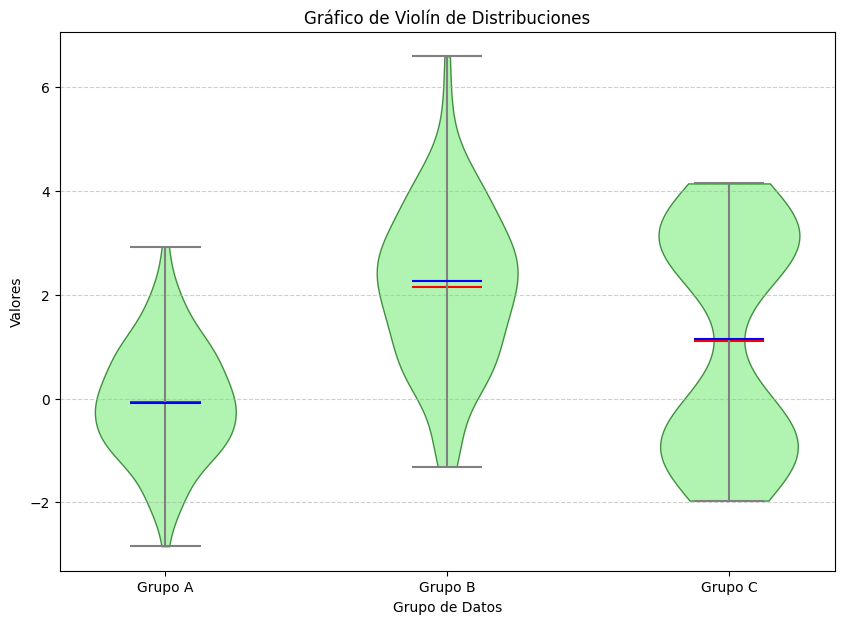

In [4]:
#Datos de ejemplo
data_group1 = np.random.normal(0, 1, 100) #Distribución normal
data_group2 = np.random.normal(2, 1.5, 100) #Otra distribución normal
data_group3 = np.concatenate([np.random.normal(-1, 0.5, 50), np.random.normal(3, 0.5, 50)]) #Distribución bimodal

dataset = [data_group1, data_group2, data_group3]

plt.figure(figsize=(10, 7))
violin_parts = plt.violinplot(dataset,
                              positions=[1, 2, 3], #Posiciones en el eje X
                              showmeans=True,    #Mostrar la media
                              showmedians=True,  #Mostrar la mediana
                              showextrema=True,  #Mostrar los extremos
                              vert=True          #Violines verticales
                             )

#Personalizar el color de los violines
for pc in violin_parts['bodies']:
    pc.set_facecolor('lightgreen')
    pc.set_edgecolor('darkgreen')
    pc.set_alpha(0.7)

#Personalizar las líneas de la media, mediana y extremos
violin_parts['cbars'].set_edgecolor('gray')
violin_parts['cmins'].set_edgecolor('gray')
violin_parts['cmaxes'].set_edgecolor('gray')
violin_parts['cmeans'].set_edgecolor('red') #Color de la media
violin_parts['cmedians'].set_edgecolor('blue') #Color de la mediana

plt.title('Gráfico de Violín de Distribuciones')
plt.xlabel('Grupo de Datos')
plt.ylabel('Valores')
plt.xticks([1, 2, 3], ['Grupo A', 'Grupo B', 'Grupo C'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

## Event Plot

Los gráficos de eventos son útiles para visualizar la ocurrencia de eventos discretos o puntuales a lo largo de uno o más ejes, a menudo en el tiempo. Pueden mostrar múltiples series de eventos de manera compacta. La función `plt.eventplot(positions, **kwargs)` crea un gráfico de eventos.

- `positions`: Un array o lista de arrays, donde cada array contiene las posiciones de los eventos para una serie.
- `orientation`: `'horizontal'` (por defecto) o `'vertical'`.
- `lineoffsets`: Desplazamiento de cada línea de eventos.
- `linelengths`: Longitud de las líneas de los eventos.
- `colors`: Colores para cada serie de eventos.

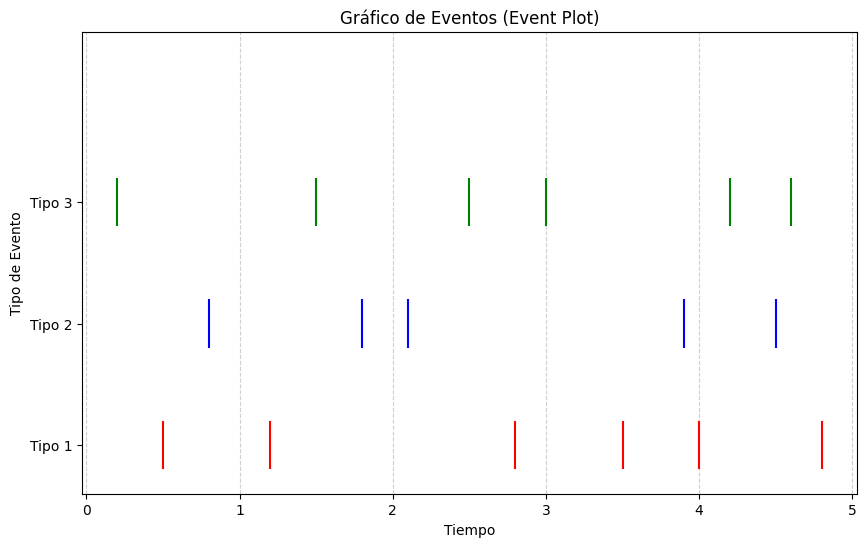

In [5]:
#Datos de ejemplo
#Tiempo de ocurrencia de diferentes tipos de eventos
event_type1_times = np.array([0.5, 1.2, 2.8, 3.5, 4.0, 4.8])
event_type2_times = np.array([0.8, 1.8, 2.1, 3.9, 4.5])
event_type3_times = np.array([0.2, 1.5, 2.5, 3.0, 4.2, 4.6])

#Podemos pasar una lista de arrays para múltiples series
event_data = [event_type1_times, event_type2_times, event_type3_times]
colors = ['red', 'blue', 'green']
labels = ['Tipo 1', 'Tipo 2', 'Tipo 3']

plt.figure(figsize=(10, 6))

#plt.eventplot asume orientación horizontal por defecto
#Podemos usar lineoffsets para separar las series verticalmente
lineoffsets = np.arange(len(event_data)) * 0.5 #Separar cada línea por 0.5 unidades
linelengths = 0.2 #Longitud de las marcas

plt.eventplot(event_data,
              orientation='horizontal',
              lineoffsets=lineoffsets,
              linelengths=linelengths,
              colors=colors,
              linestyles='solid'
             )

#Añadir etiquetas para cada tipo de evento
plt.yticks(lineoffsets, labels)

plt.title('Gráfico de Eventos (Event Plot)')
plt.xlabel('Tiempo')
plt.ylabel('Tipo de Evento')
plt.ylim(-0.2, len(event_data) * 0.5 + 0.2) #Ajustar límites Y
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

## HeatMap

Los mapas de calor son una excelente forma de visualizar datos bidimensionales donde el color representa el valor de una celda en una cuadrícula. Son muy comunes en el procesamiento de imágenes, matrices de correlación o densidades de datos. La función `plt.imshow(X, **kwargs)` muestra una imagen o datos en forma de imagen.
- `X`: Array 2D (o 3D para RGB/RGBA) de los datos a mostrar.
- `cmap`: Mapa de color (ej. `'viridis'`, `'plasma'`, `'gray'`).
- `aspect`: Relación de aspecto de los píxeles (ej. `'auto'`, `'equal'`).
- `origin`: Dónde se ubica el índice `[0,0]` de la matriz (`'upper'` por defecto para imágenes, `'lower'` para datos matemáticos).
- `extent`: Permite especificar los límites de datos para los ejes X e Y, escalando la imagen.

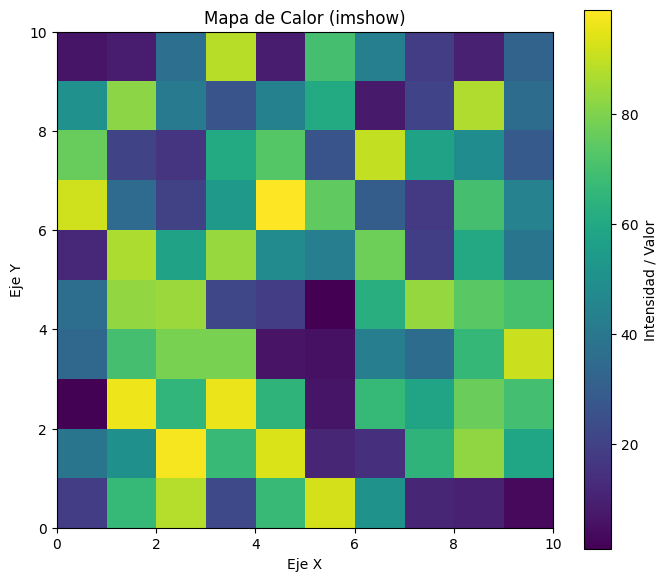

In [6]:
# Datos de ejemplo para imshow (matriz de valores)
data_heatmap = np.random.rand(10, 10) * 100
# O, por ejemplo, una matriz de correlación
# data_heatmap = np.corrcoef(np.random.rand(10, 50))

plt.figure(figsize=(8, 7))
im = plt.imshow(data_heatmap, cmap='viridis', origin='lower', extent=[0, 10, 0, 10])
plt.colorbar(im, label='Intensidad / Valor')
plt.title('Mapa de Calor (imshow)')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.show()

## Contour Plot

Los gráficos de contorno son ideales para visualizar funciones de dos variables (z=f(x,y)) mostrando curvas de nivel. `plt.contour` dibuja solo las líneas, mientras que `plt.contourf` rellena las áreas entre los niveles de contorno con colores. La función 

- `plt.contour(X, Y, Z, levels=None, **kwargs)` dibuja líneas de contorno.
  - `X, Y`: Arrays 2D de coordenadas de la cuadrícula.
  - `Z`: Array 2D de los valores de la función en cada punto de la cuadrícula.
  - `levels`: Especifica los valores de `Z` en los que se dibujarán los contornos (opcional, si no se especifica, Matplotlib elige automáticamente).
- `plt.contourf(X, Y, Z, levels=None, **kwargs)`: Dibuja contornos rellenos.
- `plt.clabel(CS, **kwargs)`: Añade etiquetas a las líneas de contorno. `CS` es el objeto devuelto por `plt.contour`.


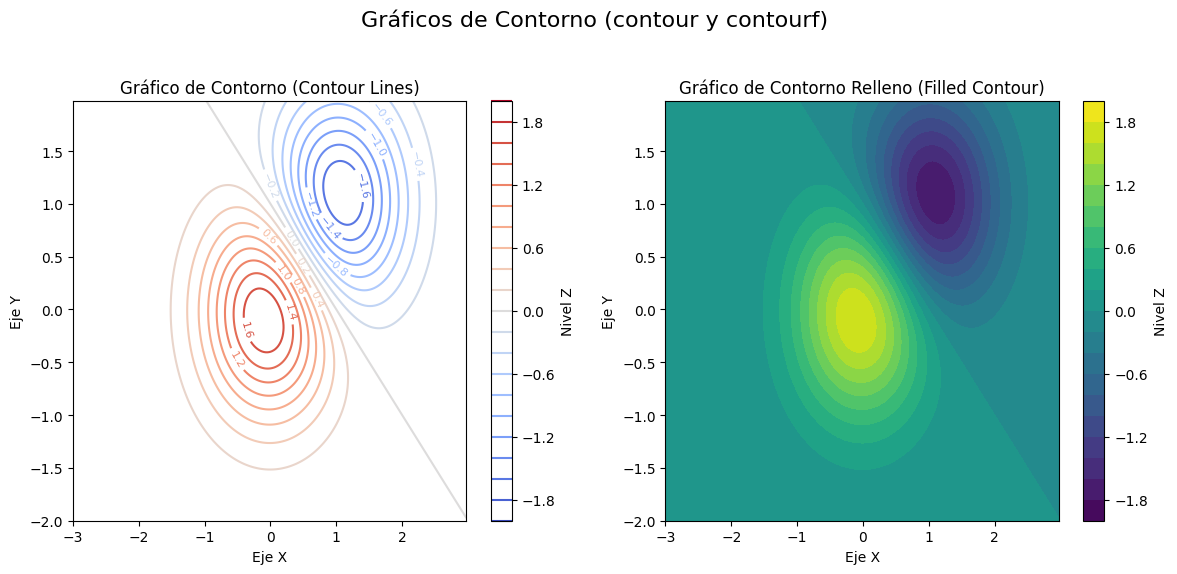

In [7]:
#Datos de ejemplo para contornos (función matemática)
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

plt.figure(figsize=(12, 6))

#Contornos solo con líneas
plt.subplot(1, 2, 1)
CS = plt.contour(X, Y, Z, levels=np.arange(-2, 2.1, 0.2), cmap='coolwarm')
plt.clabel(CS, inline=True, fontsize=8) # Añadir etiquetas a las líneas
plt.title('Gráfico de Contorno (Contour Lines)')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.colorbar(CS, label='Nivel Z')

#Contornos rellenos
plt.subplot(1, 2, 2)
CF = plt.contourf(X, Y, Z, levels=np.arange(-2, 2.1, 0.2), cmap='viridis')
plt.title('Gráfico de Contorno Relleno (Filled Contour)')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.colorbar(CF, label='Nivel Z')

plt.suptitle('Gráficos de Contorno (contour y contourf)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Polygon Mesh with Colors

`pcolormesh()` es similar a `imshow()` para visualizar datos en una cuadrícula, pero es más flexible cuando los puntos de la cuadrícula no son espaciados uniformemente o cuando se necesita un control más explícito sobre los límites de las celdas. Dibuja una malla de polígonos coloreados. La función `plt.pcolormesh(X, Y, Z, **kwargs)` crea un gráfico de malla de polígonos.
- `X, Y`: Arrays 2D o 1D que definen los límites de las celdas. Si son 1D, deben tener una unidad más que `Z`.
- `Z`: Array 2D de los valores de color.
- `cmap`: Mapa de color.

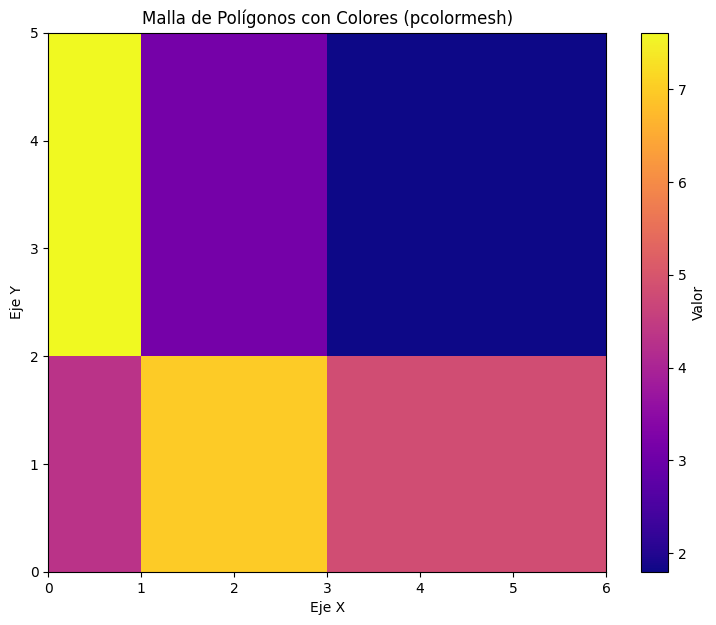

In [8]:
#Datos de ejemplo
#Cuadrícula no uniforme para demostrar flexibilidad
x_p = np.array([0, 1, 3, 6]) #Coordenadas de los bordes de las celdas X
y_p = np.array([0, 2, 5])    #Coordenadas de los bordes de las celdas Y
#Los valores Z son 1 menos que la dimensión de los bordes
Z_p = np.random.rand(len(y_p) - 1, len(x_p) - 1) * 10

plt.figure(figsize=(9, 7))
pm = plt.pcolormesh(x_p, y_p, Z_p, cmap='plasma', shading='flat') #'flat' para bordes cuadrados
#Nota: En versiones recientes, 'shading' por defecto es 'auto' que puede comportarse como 'gouraud'
#si X, Y son 2D y el número de filas/columnas de X,Y y Z son los mismos.
#Para asegurar celdas planas, explícitamente usar shading='flat'.

plt.colorbar(pm, label='Valor')
plt.title('Malla de Polígonos con Colores (pcolormesh)')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.show()

## 3D Plots

Para trabajar con gráficos 3D en Matplotlib, necesitamos importar la librería auxiliar `mpl_toolkits.mplot3d`. Esta extensión nos permite crear proyecciones tridimensionales para datos con tres coordenadas.

- `from mpl_toolkits.mplot3d import Axes3D`: (No es estrictamente necesaria en versiones recientes si usas `projection='3d'`).
- `fig.add_subplot(projection='3d')` o `ax = fig.add_subplot(111, projection='3d')`: Crea un objeto `Axes` con una proyección 3D.
- `ax.plot(xs, ys, zs, **kwargs)`: Traza una línea en 3D.
- `ax.scatter(xs, ys, zs, **kwargs)`: Crea un gráfico de dispersión en 3D.
- `ax.plot_surface(X, Y, Z, **kwargs)`: Crea una superficie 3D a partir de datos en una cuadrícula.
- `ax.plot_wireframe(X, Y, Z, **kwargs)`: Dibuja una malla de alambre 3D.
- `ax.contour3D(X, Y, Z, **kwargs)`: Crea contornos 3D de una superficie.
- `ax.contourf3D(X, Y, Z, **kwargs)`: Crea contornos 3D rellenos.

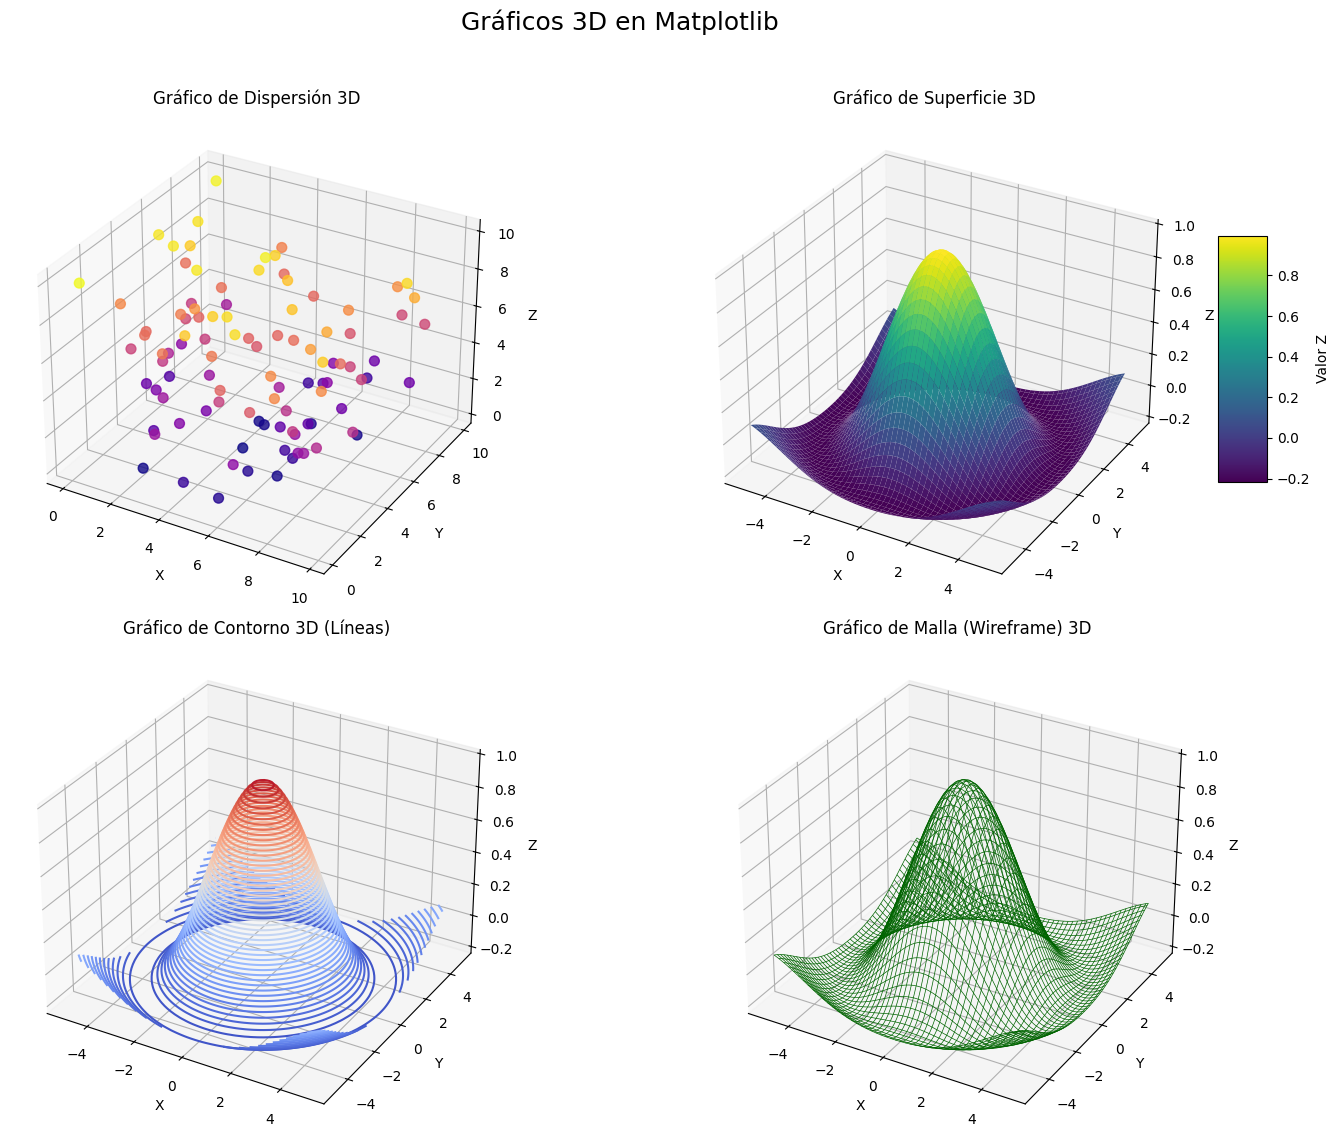

In [9]:
from mpl_toolkits.mplot3d import Axes3D #Aunque a menudo implícito con projection='3d', es buena práctica importarlo.

#Datos de ejemplo (una función tipo "sombrero" o "campana")
x_3d = np.linspace(-5, 5, 100)
y_3d = np.linspace(-5, 5, 100)
X_3d, Y_3d = np.meshgrid(x_3d, y_3d)
R_3d = np.sqrt(X_3d**2 + Y_3d**2)
Z_3d = np.sin(R_3d) / R_3d #Función sinc(R)

#Datos para dispersión 3D
N_scatter = 100
X_scatter = np.random.rand(N_scatter) * 10
Y_scatter = np.random.rand(N_scatter) * 10
Z_scatter = np.random.rand(N_scatter) * 10

fig = plt.figure(figsize=(15, 12))

#1. Gráfico de Dispersión 3D
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.scatter(X_scatter, Y_scatter, Z_scatter, c=Z_scatter, cmap='plasma', s=50, alpha=0.8)
ax1.set_title('Gráfico de Dispersión 3D')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

#2. Gráfico de Superficie 3D
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
surf = ax2.plot_surface(X_3d, Y_3d, Z_3d, cmap='viridis', edgecolor='none')
fig.colorbar(surf, ax=ax2, shrink=0.5, aspect=5, label='Valor Z') #Barra de color específica para este subplot
ax2.set_title('Gráfico de Superficie 3D')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

#3. Gráfico de Contornos 3D (líneas)
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
cset_3d = ax3.contour3D(X_3d, Y_3d, Z_3d, 50, cmap='coolwarm') #50 niveles de contorno
ax3.set_title('Gráfico de Contorno 3D (Líneas)')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')

#4. Gráfico de Malla (Wireframe)
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.plot_wireframe(X_3d, Y_3d, Z_3d, color='darkgreen', linewidth=0.5)
ax4.set_title('Gráfico de Malla (Wireframe) 3D')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('Z')

plt.suptitle('Gráficos 3D en Matplotlib', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.96]) #Ajustar layout y dejar espacio para el suptitle
plt.show()